In [1]:
!pip install pandas numpy statsmodels


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the Air Passengers dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(data_url)

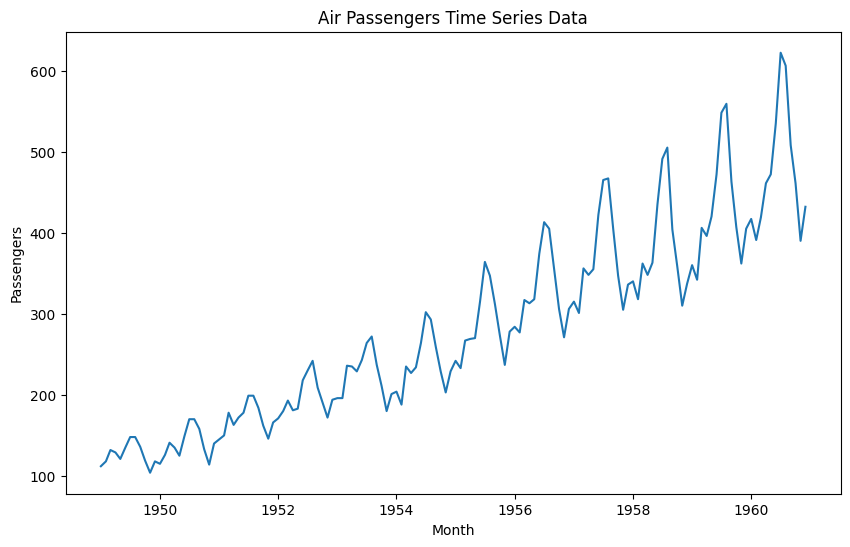

In [3]:
# Parse dates
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' column as index
data.set_index('Month', inplace=True)
series = data['Passengers']

# Plotting original data
plt.figure(figsize=(10, 6))
plt.plot(series)
plt.title('Air Passengers Time Series Data')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -685.169
Date:                Tue, 26 Mar 2024   AIC                           1378.338
Time:                        15:08:06   BIC                           1390.190
Sample:                    01-01-1949   HQIC                          1383.154
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0907      0.083     13.190      0.000       0.929       1.253
ar.L2         -0.4890      0.097     -5.046      0.000      -0.679      -0.299
ma.L1         -0.8439      0.073    -11.486      0.0

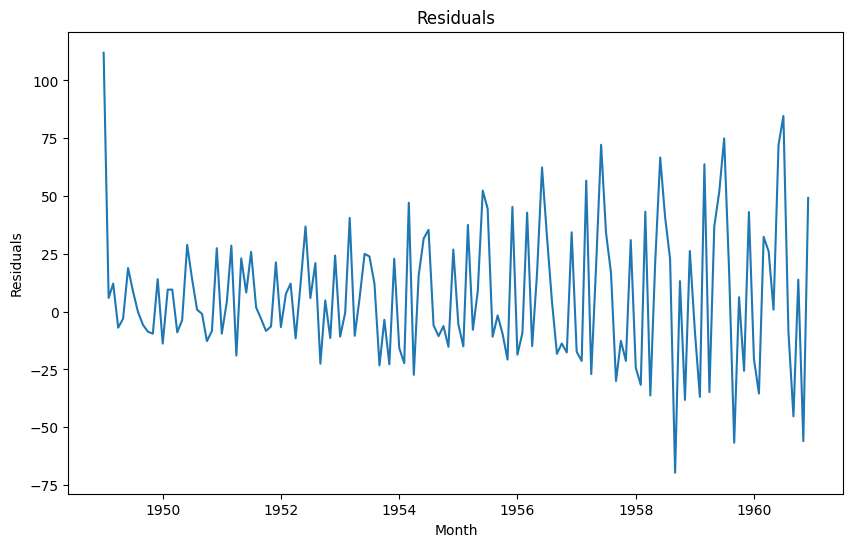

In [4]:
# Fit ARIMA model
order = (2, 1, 1)  # ARIMA(p,d,q) parameters
model = ARIMA(series, order=order)
fitted_model = model.fit()

# Summary of the fitted model
print(fitted_model.summary())

# Plotting residuals
residuals = pd.DataFrame(fitted_model.resid)
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.show()


<Figure size 1000x600 with 0 Axes>

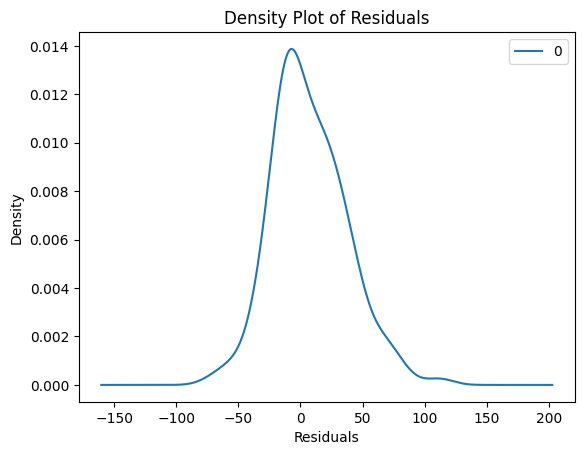

                0
count  144.000000
mean     7.168445
std     29.682685
min    -69.647194
25%    -11.799573
50%      4.482125
75%     25.905876
max    112.000000
predicted=368.118819, expected=360.000000
predicted=378.278244, expected=342.000000
predicted=342.524243, expected=406.000000
predicted=427.915168, expected=396.000000
predicted=384.058370, expected=420.000000
predicted=418.751833, expected=472.000000
predicted=471.393042, expected=548.000000
predicted=545.335920, expected=559.000000
predicted=526.995082, expected=463.000000
predicted=402.823748, expected=407.000000
predicted=388.479819, expected=362.000000
predicted=361.101746, expected=405.000000
predicted=437.013051, expected=417.000000
predicted=425.916411, expected=391.000000
predicted=387.178034, expected=419.000000
predicted=433.681542, expected=461.000000
predicted=469.933262, expected=472.000000
predicted=462.613083, expected=535.000000
predicted=536.972700, expected=622.000000
predicted=620.737185, expected=606.00000

In [5]:
# Density plot of residuals
plt.figure(figsize=(10, 6))
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Summary stats of residuals
print(residuals.describe())

# Evaluate ARIMA model using walk-forward validation
train_data = series[:'1958']
test_data = series['1959':]

history = [x for x in train_data]
predictions = []

for t in range(len(test_data)):
    model = ARIMA(history, order=order)
    fitted_model = model.fit()
    output = fitted_model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data.iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

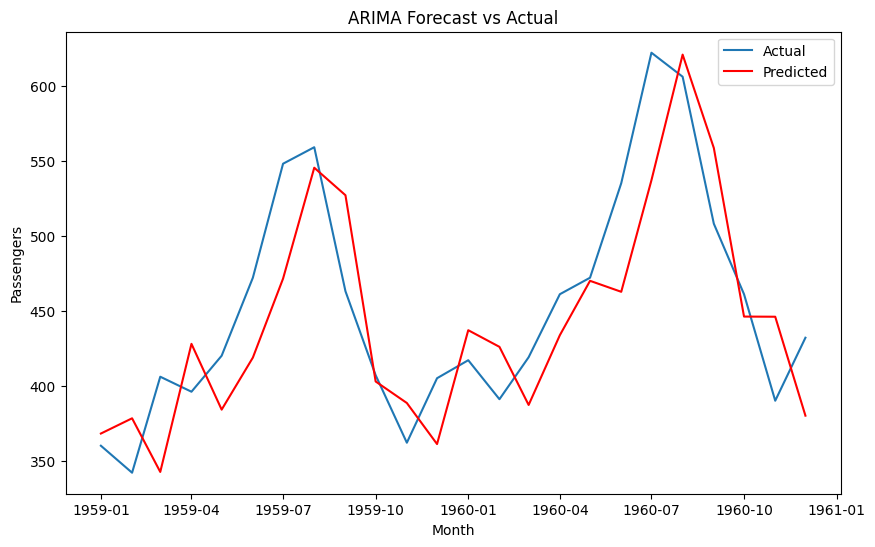

In [6]:
# Plot forecasts against actual outcomes
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual')
plt.plot(test_data.index, predictions, color='red', label='Predicted')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [7]:
!jupyter nbconvert --execute --to html "/content/ADS_LAB_7.ipynb"

[NbConvertApp] WARNING | pattern '/content/ADS_LAB_7.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec